# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(403.93, 0.005)
        return [new_thrust + 0.0001*random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 5., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

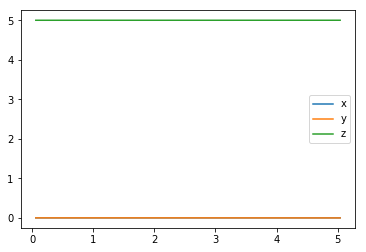

In [23]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

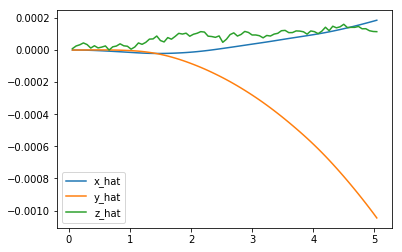

In [24]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

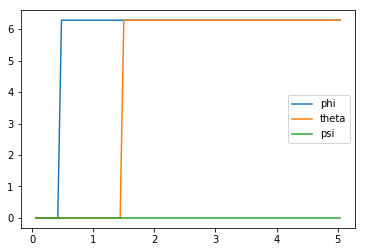

In [25]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

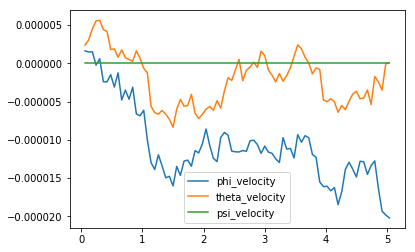

In [26]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

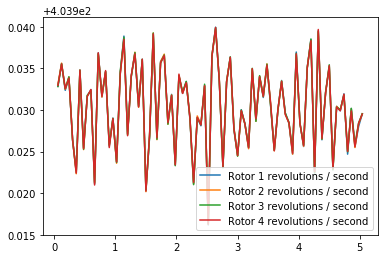

In [27]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [28]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 1.94101715e-04 -1.46391867e-03  5.00042368e+00  6.28313194e+00
  6.28317468e+00  0.00000000e+00]
[ 0.0001856  -0.00104554  0.0001145 ]
[-2.01940476e-05  6.52925834e-08  0.00000000e+00]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 2000
target_pos = np.array([0., 0., 20.])
runtime=50
task = Task(target_pos=target_pos, runtime=runtime)
agent = PolicySearch_Agent(task) 
scores=[]
states=[]

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        states.append(state[:3])
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            scores.append(agent.score)
            break
    sys.stdout.flush()

Episode =  111, score = -10.641 (best =  -9.133), noise_scale = 1.24401812699372776

This agent should perform very poorly on this task.  And that's where you come in!

In [35]:
ten_episode_avg=[]
for iter in range(len(scores)-10):
    avg=np.array(scores[iter:iter+10]).mean()
    ten_episode_avg.append(avg)

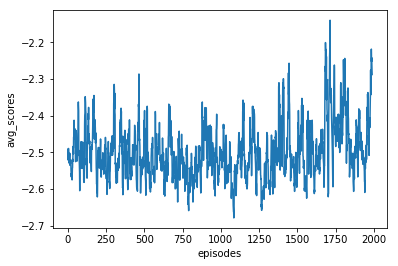

In [36]:
plt.figure()
plt.plot(ten_episode_avg)
plt.ylabel('avg_scores')
plt.xlabel('episodes')
plt.show()

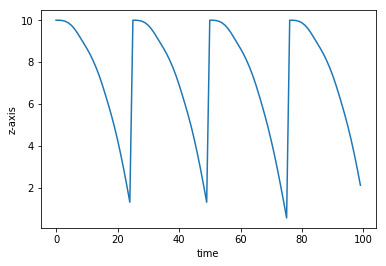

In [26]:
plt.figure()
plt.plot(np.array(states)[:100, 2])
plt.ylabel('z-axis')
plt.xlabel('time')
plt.show()

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

# Task: to fly from an initial specified position to a target position 

## <font color=green>case 1: initial position is vertically below the target position</font>

In [1]:
## TODO: Train your agent here.

In [ ]:
# Here I have shown the results for my agent's performance using the reward function called "get_delta_distance_reward_1"
# This is one of the 5 different reward functions I tried in order to teach the quad 

In [1]:
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

from agents.agent import Agent
from task import Task

Using TensorFlow backend.


In [3]:
import sys

In [4]:
initial_pos=np.array([0.0, 0.0, 8.0,0.0,0.0,0.0])
target_pos=np.array([0.0,0.0,30.0])
runtime=5
task=Task(init_pose=initial_pos, runtime=runtime, target_pos=target_pos)

In [5]:
sample_size=128
buffer_size=200000
tau=0.75
learning_rate=0.001
agent=Agent(buffer_size=buffer_size, env=task, tau=tau, sample_size=sample_size, learning_rate=0.01)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [6]:
agent.local_actor.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 18)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                608       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
__________

In [7]:
agent.local_critic.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 18)           0                                            
__________________________________________________________________________________________________
actions (InputLayer)            (None, 4)            0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 32)           608         input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 32)           160         actions[0][0]                    
__________________________________________________________________________________________________
batch_norm

In [8]:
num_episodes = 2000
scores=[]
actions=[]

In [9]:
for episode in range(1,num_episodes+1):
    state=agent.reset()
    done = False
    while not done:
        action=agent.action(state=state)
        actions.append(action)
        next_state, reward, done, success = agent.step(state=state,action=action)
        if done:
            scores.append(agent.score)
            print("\rEpisode: {}, current_score:{:.4f}, best_score:{:.4f}, noise_scale:{:.4f}, agent_learning: {}, success: {}".format(episode, agent.score, agent.best_score, agent.noise_scale, agent.learning_mode, success), end=" ")
        state=next_state
    sys.stdout.flush() 

Episode: 2000, current_score:477.5429, best_score:477.5429, noise_scale:0.0000, agent_learning: 0, success: 1                                                                                                                                                                            

### Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [10]:
## TODO: Plot the rewards.

In [11]:
print('total number of experiences: {}'.format(len(agent.replay_buffer.memory)))

total number of experiences: 66782


In [12]:
np.var(scores[-1:-251:-1])

0.0

In [13]:
import matplotlib.pyplot as plt

In [14]:
# To compute and plot the running average score over n consecutive episodes

def n_episode_avg(n=10):
    n_episode_avg=[]
    for iter in range(len(scores)-n):
        avg=np.array(scores[iter:iter+n]).mean()
        n_episode_avg.append(avg)
    plt.figure()
    plt.plot(n_episode_avg)
    plt.ylabel('avg_score_over_{}_episodes'.format(n))
    plt.xlabel('episodes')
    plt.show()   

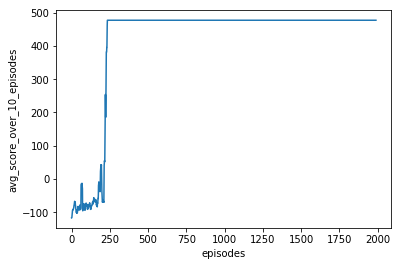

In [15]:
n_episode_avg(10)

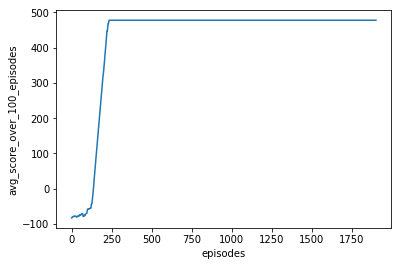

In [16]:
n_episode_avg(100)

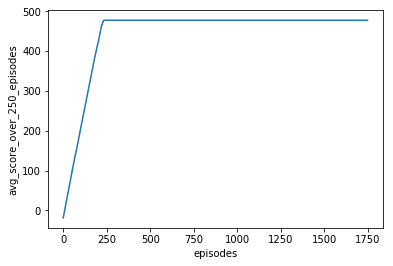

In [17]:
n_episode_avg(250)

In [18]:
def n_step_action_avg(n=10):
    n_step_avg1=[]
    n_step_avg2=[]
    n_step_avg3=[]
    n_step_avg4=[]
    for iter in range(len(actions)-n):
        avg_rotor1=np.array(actions[iter:iter+n][0]).mean()
        n_step_avg1.append(avg_rotor1)
        avg_rotor2=np.array(actions[iter:iter+n][1]).mean()
        n_step_avg2.append(avg_rotor2)
        avg_rotor3=np.array(actions[iter:iter+n][2]).mean()
        n_step_avg3.append(avg_rotor3)
        avg_rotor4=np.array(actions[iter:iter+n][3]).mean()
        n_step_avg4.append(avg_rotor4)
    plt.figure()
    plt.plot(n_step_avg1, label='rotor1_speed')
    plt.plot(n_step_avg2, label='rotor2_speed')
    plt.plot(n_step_avg3, label='rotor3_speed')
    plt.plot(n_step_avg4, label='rotor4_speed')
    plt.ylabel('avg_action_over_{}_steps'.format(n))
    plt.xlabel('steps')
    plt.legend()
    plt.show() 

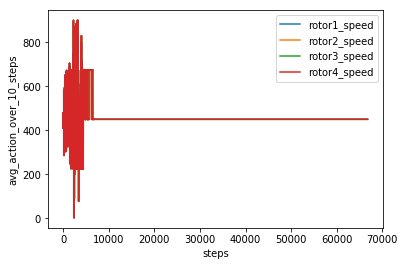

In [19]:
n_step_action_avg(10)

## Saving the results

In [20]:
import pandas as pd

In [21]:
reward_scheme='get_delta_distance_reward_1'
trial=4
file_name='scores_over_different_trials/scores-{}-trial-{}.csv'.format(reward_scheme,trial)
print(file_name)

scores_over_different_trials/scores-get_delta_distance_reward_1-trial-4.csv


In [22]:
df=pd.DataFrame(scores, columns=["episode_scores"])

In [23]:
df.describe()

,episode_scores
count,2000.000000
mean,415.519262
std,174.493763
min,-161.206349
25%,477.542857
50%,477.542857
75%,477.542857
max,477.542857


In [24]:
df.to_csv(file_name)

In [25]:
file_name='scores_over_different_trials/actions-{}-trial-{}.csv'.format(reward_scheme,trial)
print(file_name)

scores_over_different_trials/actions-get_delta_distance_reward_1-trial-4.csv


In [26]:
df=pd.DataFrame(np.array(actions), columns=["rotor 1", "rotor 2", "rotor 3", "rotor 4"])

In [27]:
df.head()

,rotor 1,rotor 2,rotor 3,rotor 4
0,389.483407,524.397057,389.773875,335.532722
1,387.986788,536.404640,393.874443,340.713407
2,394.929204,557.018734,387.970992,346.985050
3,598.107514,404.798289,321.153603,533.979422
4,438.212647,633.509927,353.450717,390.517283


In [28]:
actions[0]

array([389.48340731, 524.39705663, 389.77387499, 335.53272156])

In [29]:
df.to_csv(file_name)

## <font color=green>case 2: initial position is at an angle from the target position</font>

In [30]:
## TODO: Train your agent here.

In [1]:
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

from agents.agent import Agent
from task import Task

Using TensorFlow backend.


In [3]:
import sys

In [4]:
initial_pos=np.array([1.0, 1.0, 1.0,0.0,0.0,0.0])
target_pos=np.array([5.0,5.0,5.0])
runtime=5
task=Task(init_pose=initial_pos, runtime=runtime, target_pos=target_pos)

In [5]:
sample_size=128
buffer_size=200000
tau=0.75
learning_rate=0.001
agent=Agent(buffer_size=buffer_size, env=task, tau=tau, sample_size=sample_size, learning_rate=0.01)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [6]:
agent.local_actor.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 18)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                608       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
__________

In [7]:
agent.local_critic.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 18)           0                                            
__________________________________________________________________________________________________
actions (InputLayer)            (None, 4)            0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 32)           608         input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 32)           160         actions[0][0]                    
__________________________________________________________________________________________________
batch_norm

In [8]:
num_episodes = 2000
scores=[]
actions=[]

In [9]:
for episode in range(1,num_episodes+1):
    state=agent.reset()
    done = False
    while not done:
        action=agent.action(state=state)
        actions.append(action)
        next_state, reward, done, success = agent.step(state=state,action=action)
        if done:
            scores.append(agent.score)
            print("\rEpisode: {}, current_score:{:.4f}, best_score:{:.4f}, noise_scale:{:.4f}, agent_learning: {}, success: {}".format(episode, agent.score, agent.best_score, agent.noise_scale, agent.learning_mode, success), end=" ")
        state=next_state
    sys.stdout.flush() 

Episode: 2000, current_score:-49.7170, best_score:0.1882, noise_scale:0.1609, agent_learning: 1, success: 0     

### Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [12]:
## TODO: Plot the rewards.

In [10]:
print('total number of experiences: {}'.format(len(agent.replay_buffer.memory)))

total number of experiences: 26717


In [11]:
np.var(scores[-1:-251:-1])

7275.89898234997

In [12]:
import matplotlib.pyplot as plt

In [13]:
# To compute and plot the running average score over n consecutive episodes

def n_episode_avg(n=10):
    n_episode_avg=[]
    for iter in range(len(scores)-n):
        avg=np.array(scores[iter:iter+n]).mean()
        n_episode_avg.append(avg)
    plt.figure()
    plt.plot(n_episode_avg)
    plt.ylabel('avg_score_over_{}_episodes'.format(n))
    plt.xlabel('episodes')
    plt.show()   

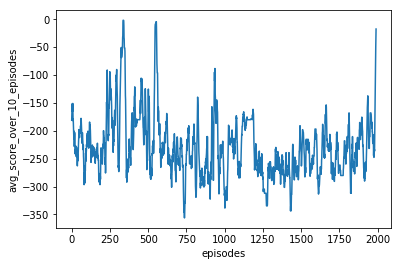

In [14]:
n_episode_avg(10)

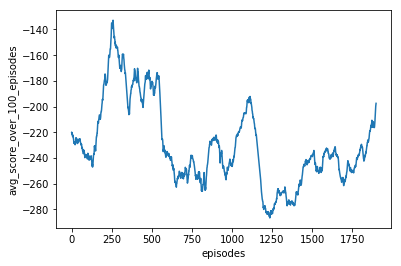

In [15]:
n_episode_avg(100)

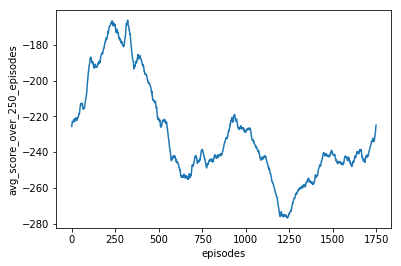

In [16]:
n_episode_avg(250)

In [17]:
def n_step_action_avg(n=10):
    n_step_avg1=[]
    n_step_avg2=[]
    n_step_avg3=[]
    n_step_avg4=[]
    for iter in range(len(actions)-n):
        avg_rotor1=np.array(actions[iter:iter+n][0]).mean()
        n_step_avg1.append(avg_rotor1)
        avg_rotor2=np.array(actions[iter:iter+n][1]).mean()
        n_step_avg2.append(avg_rotor2)
        avg_rotor3=np.array(actions[iter:iter+n][2]).mean()
        n_step_avg3.append(avg_rotor3)
        avg_rotor4=np.array(actions[iter:iter+n][3]).mean()
        n_step_avg4.append(avg_rotor4)
    plt.figure()
    plt.plot(n_step_avg1, label='rotor1_speed')
    plt.plot(n_step_avg2, label='rotor2_speed')
    plt.plot(n_step_avg3, label='rotor3_speed')
    plt.plot(n_step_avg4, label='rotor4_speed')
    plt.ylabel('avg_action_over_{}_steps'.format(n))
    plt.xlabel('steps')
    plt.legend()
    plt.show() 

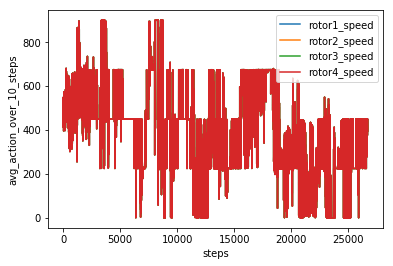

In [18]:
n_step_action_avg(10)

## Saving the results

In [19]:
import pandas as pd

In [20]:
reward_scheme='get_delta_distance_reward_1'
trial=4 
file_name='scores_over_different_trials/scores-{}-trial-{}-target_at_angle.csv'.format(reward_scheme,trial)
print(file_name)

scores_over_different_trials/scores-get_delta_distance_reward_1-trial-4-target_at_angle.csv


In [21]:
df=pd.DataFrame(scores, columns=["episode_scores"])

In [22]:
df.describe()

,episode_scores
count,2000.000000
mean,-227.903507
std,90.821312
min,-477.904762
25%,-299.690476
50%,-228.181818
75%,-168.966667
max,0.188235


In [23]:
df.to_csv(file_name)

In [24]:
file_name='scores_over_different_trials/actions-{}-trial-{}-target_at_angle.csv'.format(reward_scheme,trial)
print(file_name)

scores_over_different_trials/actions-get_delta_distance_reward_1-trial-4-target_at_angle.csv


In [25]:
df=pd.DataFrame(np.array(actions), columns=["rotor 1", "rotor 2", "rotor 3", "rotor 4"])

In [26]:
df.head()

,rotor 1,rotor 2,rotor 3,rotor 4
0,394.657370,440.197468,513.064278,481.732030
1,393.738185,439.024466,512.010319,481.374720
2,393.997601,437.629804,509.714917,479.967926
3,281.638401,448.143929,460.033202,464.459896
4,318.560434,402.785242,596.953790,594.531553


In [27]:
actions[0]

array([394.65737041, 440.1974677 , 513.06427811, 481.73202956])

In [28]:
df.to_csv(file_name)

## Results from various different reward schemes

In [1]:
import pandas as pd

In [2]:
df1= pd.read_csv("scores_over_different_trials/scores-get_cosine_reward-trial-1.csv")['episode_scores']
df2= pd.read_csv("scores_over_different_trials/scores-get_delta_distance_reward_1-trial-4.csv")['episode_scores']
df3= pd.read_csv("scores_over_different_trials/scores-get_delta_distance_reward_2-trial-1.csv")['episode_scores']
df4= pd.read_csv("scores_over_different_trials/scores-get_delta_distance_reward_3-trial-1.csv")['episode_scores']
df5= pd.read_csv("scores_over_different_trials/scores-get_delta_distance_reward_4-trial-2.csv")['episode_scores']

In [3]:
df=[df1, df2, df3, df4, df5]
titles=['cosine_reward', 'delta_distance_reward_1','delta_distance_reward_2','delta_distance_reward_3','delta_distance_reward_4','delta_distance_reward_5']

In [4]:
import matplotlib.pyplot as plt

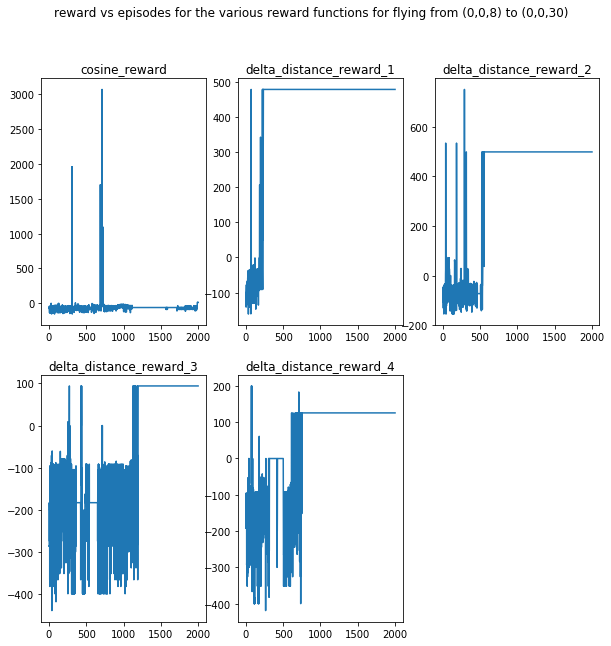

In [5]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(df[i])
    plt.title(titles[i])
plt.suptitle('reward vs episodes for the various reward functions for flying from (0,0,8) to (0,0,30)')    
plt.show()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:


The task I specified for the quadcopter was to fly from a given initial position to a given target position. For my initial test, I tried to make the quad fly to a position which was vertically above it. I was able to find a couple of different reward schemes which made the quad accomplish this goal. However, I was not able to fine tune the rewards or the hyperparameters, to enable the quad to reach a more general target point which was not vertically above it's starting position. 


For vertical flight I made the quad go from a point with coordinates (0,0,8) to a target at (0,0,30).

For a more general target, I tried to make the quad go from the point with coordinates (1,1,1) to the point at (5,5,5).

The different reward schemes I tried are as follows:

_Note that, in all the follwing schemes, I declared the quad to be successful, if it's current distance from the target was less than 5% of the original distance._ 


- __Scheme 1__: A reward scheme I tried was to use the action repeats to compute the angle between the quad's velocity vector and it's current position with respect to the target. The reward/penalty accrued by the quad was equal to the cosine of this angle. Thus the quad obtained the maximal possible reward if it's velocity vector pointed towards the target while a negative reward if the velocity pointed in the opposite direction to the target. The hope was that this will encourage the quad to fly directly towards the target. I included a very large penalty if the quad crashed into the walls/floor/ceiling of the room. Also, I gave a big reward to the target if the distance from target reduced to less than 20% of the original distance, another bigger reward if the distance reduced to being less than 10% of the starting distance and a very large reward if the distance reduced to being less than 5% of the orginal distance. Also, if the distance between the quad and the target became less than 5% of the starting distance, the quad was declared successful and the episode was terminated.

This scheme is implemented in the function called "get_cosine_reward"

result: I tested this scheme with a couple of different choices for the noise and exploration rate, however, I was not able to find anything that worked. The quad was not even able to learn how to reach a target vertically above it. 

- __Scheme 2__: I used action repeats to compute if the distance between the quad and the target position decreased or increased as a result of the action. Then gave a +1 reward if the distance between the quad and the target position decreased and a penalty of -1 if the distance decreased. I also included a very large penalty if the quad crashed into the walls/floor/ceiling of the room. Through experimentation, I found it was better to give higher rewards as the target got closer to the target. Thus I gave a big reward to the target if the distance from target reduced to less than than 20% of the original distance, another bigger reward if the distance reduced to being less than 10% of the starting distance and a very large reward if the distance reduced to being less than 5% of the orginal distance. Also, if the distance between the quad and the target became less than 5% of the starting distance, the quad was declared successful and the episode was terminated. Once the quad was closer than closer than 20% of its starting distance from the target, it did not receive any penalty for actions that would make it move away from the target, as long as it stayed within this 20% range. This implied that there was a danger that the quad might learn how to increase its collected rewards by reducing it's distance to within 10% of the starting distance and just continuing to hover in that region without moving to the target. To disfavor this situation, I made sure that the reward that the quad gets by successfully finishing it's task was much much larger than what it can collect by just howering within the 10% range of the target.

This scheme is implemented in the function called "get_delta_distance_reward_1"

result: Upon using the OU-noise parameters to be given by $\sigma$ = 0.5 and $\theta$ = 0.15, I found that the quad was easily able to learn how to fly to a target that was vertically above its starting position. It took experiences collected over about 250 episodes to learn this. However, the quad was not able to learn to fly to a target position that was not vertically above its starting position.  



- __Scheme 3__: This is a small variation of Scheme 2. In scheme 2, as long as the distance between the quad and the target was less than 20% of the original distance, it got a high reward but incurred no penalty if its action caused the quad to move slightly away from the target than it's current position. In scheme 3 i.e., the current scheme, I included many more stages (characterised by the percentage of original distance covered) with increasing rewards as these were crossed. The main difference from scheme 2 was that as the quad got closer to the target, I included an increasingly large penalty for actions that would make it move away from the target with respect to its current position.

This scheme is implemented in the function called "get_delta_distance_reward_2"

result: This scheme of rewards also worked quite well for a target that was positioned vertically above the starting position. The quad learnt to accomplish this task after a little more than 500 episodes. However, the quad failed learn to fly to a more general target that was not vertically above it's target position. 


- __Scheme 4__: In scheme 4, I tried something quite different from the above schemes. Thus I gave the quad negative rewards (proportional to the fraction of distance left to be covered) until the quad reached its target whence it recieved a very large positive reward. The caveat in such a scheme was that there was chance that the quad would simply learn to end the episode by purposefully slamming into the walls/floor/ceiling of the environment, in order to reduce the penalties accrued by this. To overcome this possibility, I ensured that the penalty for slamming into the boundaries of the environment was very large such that it was more advantageous for the quad to continue its journey to the target rather than prematurely ending it. I found it was again helpful to include better incentives as the quad got closer to the target. Thus, if the quad was less than 20% of it's original distance away from the target, I gave it an additional positive reward if its actions brought it closer to the target and a negative reward if it's actions took it away from the target. The amount of rewards/penalties it obtained was increased if it's current distance was less than 10% of the orginal distance. The quad was declared successfull if it's remaining distance to the target was less than 5% of the starting distance. 

This scheme is implemented in the function called "get_delta_distance_rewards_3"

result: The quad learnt how to fly to a target that was vertically above it's initial position in about 1250 episodes. However, it failed to learn to fly to a target that was at a more general position with respect to the starting position of the quad. 

- __Scheme 5__: In scheme 5 I tried to improve scheme 4 by using a smooth function for reward shaping. Thus the quad now got negative rewards that were proportional to the 0.2 power of the fraction of distance remaining. Thus the penalty accrued by the quad continuously decreased as the quad progressed towards the target. It was declared successful and got a large positive reward upon reaching within 5% of the original distance from the target. It also received a very large penalty for coming too close to the boundaries of the environment.

This scheme is implemented in the reward function called "get_delta_distance_rewards_4"

result: The quad learnt how to fly to the target that was vertically above its starting position in about 750 episodes. However, it failed to learn how to fly to a more general target position. 






**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I implemented the DDPG algorithm to get an agent to learn how to fly the quadcopter. The network architectures I used are as follows:

- actor: The critic takes the current state of the quadcopter as an input and ultimately produces the rotor speeds as the quad's action. It does this through a fully connected neural network with 3 hidden layers containing 32, 64, 32 neurons respectively. All the layers in the hidden layers have a ReLU activation while the final output layer has a sigmoid activation. This output is then appriately scaled to map to values between the minimum and maximum allowed rotor speeds. We also applied batch normalization to all the hidden layers. 

The final rotor speed that is applied by the quad is obatined by adding some noise produced through the [OU process](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process). The parameters this OU noise that seemed to work best for me were $\sigma = 0.5$ and $\theta = 0.15$. We scaled this noise by an annealed exploration rate before adding it to the output from the actor. The exploration rate is kept constant during each episode but is annealed with each episode.

- critic: The critic takes the current state and the action applied in the current state as an input. The state input is then passed through a fully connected neurel net consisting of 2 hidden layers with 32 and 64 neurons respectively. Each of these neurons have a ReLU activation. Similarly the action input is also passed through an independent neural net with identical configuration as the state input. The output of these two neural nets (one for the state input and the other for the action input), are then concatenated and passed through 3 hidden layers consisting of 32, 64 and 32 neurons respectively, with ReLU activation. The final output layer consists of a single neuron, without any activation. This is expected to produce a Q-value for this state action pair. Similarly to the actor's DNN, we apply batch normalization to all the hidden layers.  

I used learning rate $\alpha = 0.001$ and a discount rate $\gamma = 0.99$.

|learning rate| discount rate | OU_noise| exploration rate|
|-|-|-|:---|
|$\alpha = 0.001$| $\gamma=0.99$| $\sigma = 0.5$ <br> $\theta = 0.15$| $\epsilon_0 = 1$ <br> $\epsilon_t = 0.999 \epsilon_{t-1}$|

Additionally, I implemented "early stopping" as in, once the agent was succesful for more than 8 times in 10 consecutive episodes, I stopped it from further updating its weights.   

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The task of getting a quad to fly from an initial point to a target point did not appear to be easy to learn. For all the reward schemes that I tried, the quad failed to show any significant improvement over a period of 2000 episodes. 

However, it looks like that the subtask of flying to a target vertically above its starting position was quite simple and straight forward to learn. In the following code cell, I have shown the plot of rewards per episode for the various reward schemes. One can see that for the reward function called "get_delta_distance_reward_1", the quad took less than 250 episodes to learn the task. I also ascertained this by requiring the agent to print out "sucess" on the screen whenever it was able to accomplish the task. 

It can be clearly seen that there is a very high jump in the rewards earned by the quad, once it learns how to solve the task. This implies that rather than being gradual, there was more of an aha moment when the agent found the correct set of weights that solves the task. The final performance of the agent, once it was successful, was also very good. For the reward function called "get_delta_distance_reward_1", the agent consistenly got a score that was slightly below 500 points, once it learned the task, as opposed to the score being just slightly worse than -100 points before learning the task.  

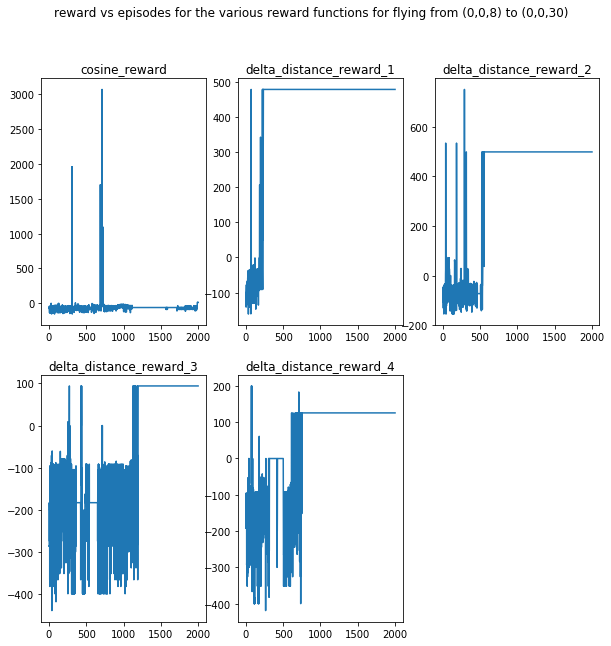

In [6]:
# The agent successfully learnt from the following reward functions:
# delta_distance_reward_1, delta_distance_reward_2, delta_distance_reward_3, delta_distance_reward_4
# This was explicitly ascertained by requiring the agent to print ""success" whenever it was successfull in finishing the task 
# The spikes in the graph correspond to the instances when it accomplished the task but wasn't as successfull in the next few attempts
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(df[i])
    plt.title(titles[i])
plt.suptitle('reward vs episodes for the various reward functions for flying from (0,0,8) to (0,0,30)')    
plt.show()

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

One of the hardest part of this project was coming up with a good reward scheme that will allow the quadcopter to learn how to do the task assigned to it. As can be seen from the different rewrd schemes I tried to implement, I was able to get the quad to fly to a point that was vertically above its starting position but not to a more general target point. This made me realize that designing a reward function is a highly non-trivial job which requires quite a bit of creativity. 

One of the reasons, I feel that the agent did not learn how to fly to a more generic position was because of sparsity of sucessfull episodes. This sparsity implied that there was a smaller chance of them to be sampled from the replay memory. I think one way to rectify this will be to use "Prioritized Experience Replay" as described [here](https://arxiv.org/pdf/1511.05952.pdf).

Another way to improve this project might be to use a different learning algorithm such as A3C or A2C etc. 

Even, when I was able to get the quad to fly to a position that was vertically above it, I found that it was important to make sure that there were no loopholes which would allow the agent to maximize its reward (or minimize its penalty) without actually accomplishing the task. This to me was an important and interesting aspect of understanding the agents behaviour. 

Another thing I found important to keep in mind was that the learning was somewhat dependent on the initial weights that were assigned to the neural nets. Hence even when I found a reward scheme that allowed agent to learn how to fly to a target vertically above it, the agent will end up not accomplishing the task and I would have to restart the simulation. Thus it was important to rerun the simulation a couple of times before deciding if a particular reward function was completely useless or had some potential for success. This also implied that the number of episodes it took the agent to learn the task varied quite a bit upon reruns. 

